In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = r"C:\Users\user\Desktop\cancer data.csv" 
df = pd.read_csv(file_path)

# Output the first lines
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Checking data types
print(df.info())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [3]:
# Basic statistics
print(df.describe())

# Number of patients with and without cancer
print(df["LUNG_CANCER"].value_counts())

# Check for unique values in categorical columns
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

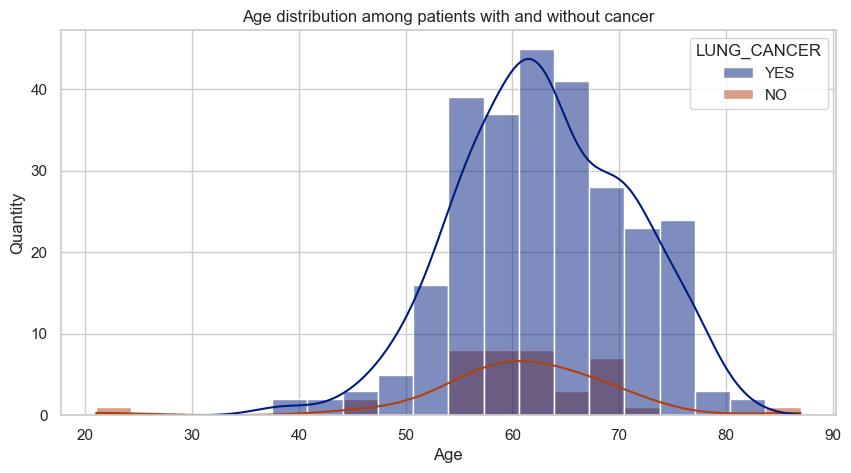

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="AGE", hue="LUNG_CANCER", kde=True, bins=20, palette="dark")
plt.title("Age distribution among patients with and without cancer")
plt.xlabel("Age")
plt.ylabel("Quantity")
plt.show()

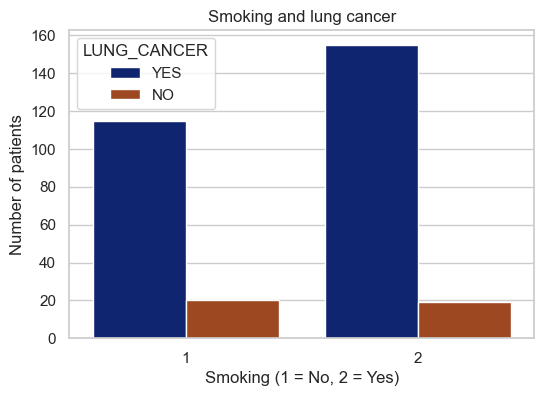

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="SMOKING", hue="LUNG_CANCER", palette="dark")
plt.title("Smoking and lung cancer")
plt.xlabel("Smoking (1 = No, 2 = Yes)")
plt.ylabel("Number of patients")
plt.show()

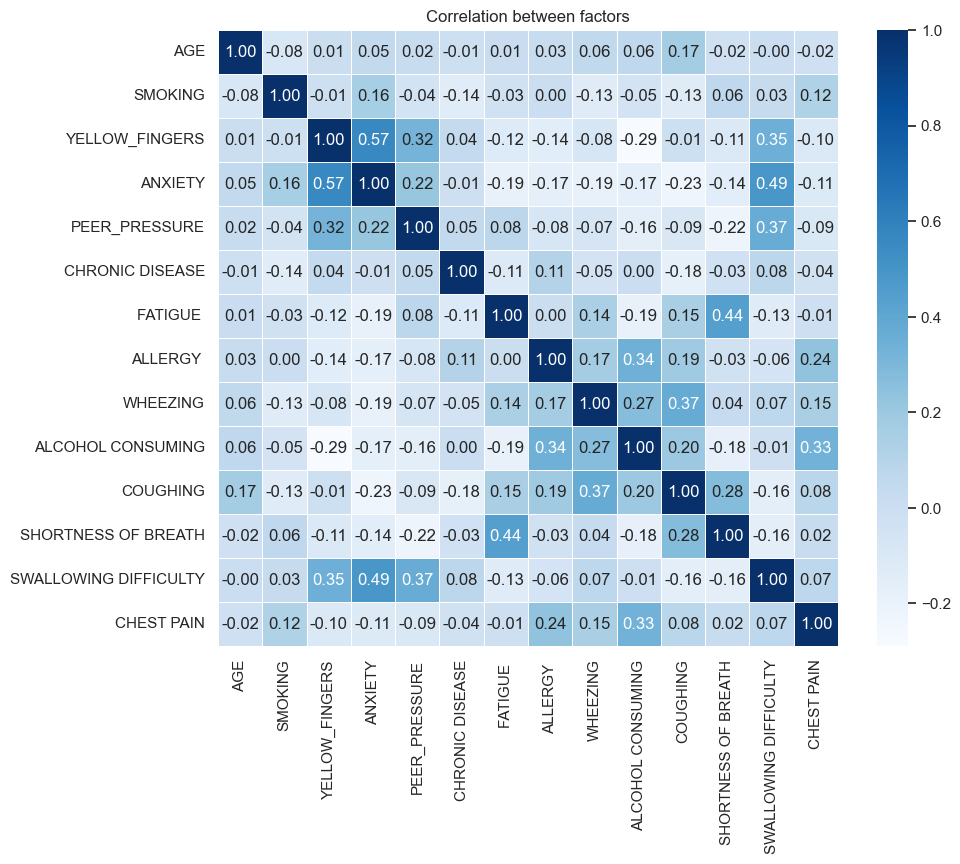

In [10]:
# Remove non-numeric columns
corr_matrix = df.drop(columns=["GENDER", "LUNG_CANCER"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation between factors")
plt.show()

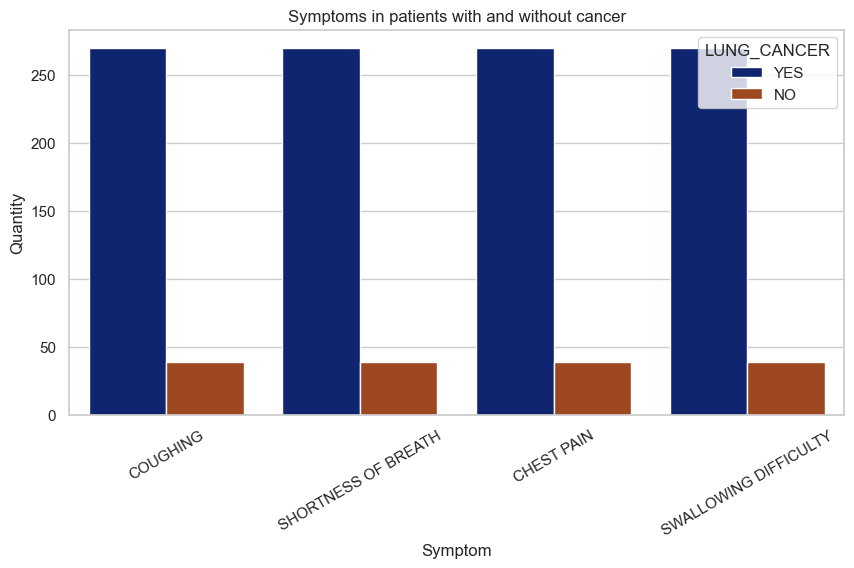

In [8]:
# Select key symptoms
symptom_columns = ["COUGHING", "SHORTNESS OF BREATH", "CHEST PAIN", "SWALLOWING DIFFICULTY"]
df_symptoms = df.melt(id_vars=["LUNG_CANCER"], value_vars=symptom_columns, var_name="Symptom", value_name="Presence")

plt.figure(figsize=(10, 5))
sns.countplot(data=df_symptoms, x="Symptom", hue="LUNG_CANCER", palette="dark")
plt.title("Symptoms in patients with and without cancer")
plt.xlabel("Symptom")
plt.ylabel("Quantity")
plt.xticks(rotation=30)
plt.show()